Importing Libraries

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Training Image preprocessing

In [29]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [30]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
# # To avoid overshooting the loss function, choose a smaller learning rate.
# # The default is usually 0.001, but here we have set it to 0.0001.
# learning_rate = 0.0001
#
# # However, using a small learning rate may lead to underfitting.
# # To mitigate this, we can increase the number of neurons in the network to capture more complex patterns.
# num_neurons = 128  # Example: Increase the number of neurons
#
# # Adding more convolutional layers can help the model extract additional features from the images.
# # This will help prevent the model from missing important features or becoming confused due to lack of sufficient features.
# num_conv_layers = 3  # Example: Add more convolutional layers


Building Model

In [32]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [40]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [41]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [42]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [43]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [44]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4071s 2s/step - accuracy: 0.3823 - loss: 2.2010 - val_accuracy: 0.7941 - val_loss: 0.6246
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4626s 2s/step - accuracy: 0.8254 - loss: 0.5485 - val_accuracy: 0.8960 - val_loss: 0.3242
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4059s 2s/step - accuracy: 0.9012 - loss: 0.3049 - val_accuracy: 0.9122 - val_loss: 0.2815
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4585s 2s/step - accuracy: 0.9320 - loss: 0.2059 - val_accuracy: 0.9537 - val_loss: 0.1466
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3994s 2s/step - accuracy: 0.9514 - loss: 0.1513 - val_accuracy: 0.9467 - val_loss: 0.1627
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4176s 2s/step - accuracy: 0.9639 - loss: 0.1093 - val_accuracy: 0.9581 - val_loss: 0.1310
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4176s 2s/step - accuracy: 0.9714 - loss: 0.0884 - val_accuracy: 0.9547 - val_loss: 0.1469
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4155s 2s/step - accuracy: 0.9754 -

Evaluating Model

In [46]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1090s 496ms/step - accuracy: 0.9923 - loss: 0.0241
Training accuracy: 0.9930009245872498


In [47]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 281s 510ms/step - accuracy: 0.9668 - loss: 0.1185
Validation accuracy: 0.9673343896865845


Saving Model

In [48]:
cnn.save('trained_plant_disease_model.keras')

In [49]:
#Return Dictionary of history
training_history.history

{'accuracy': [0.5835265517234802,
  0.8509424328804016,
  0.9092823266983032,
  0.9381890892982483,
  0.9536524415016174,
  0.9645636081695557,
  0.9716196060180664,
  0.9760580658912659,
  0.9776371121406555,
  0.981492280960083],
 'loss': [1.4143245220184326,
  0.4682053029537201,
  0.27803581953048706,
  0.18882857263088226,
  0.14105449616909027,
  0.10684332996606827,
  0.08642449975013733,
  0.07353723794221878,
  0.06874319165945053,
  0.05719712749123573],
 'val_accuracy': [0.794104278087616,
  0.8960277438163757,
  0.9121898412704468,
  0.9537332057952881,
  0.9467334151268005,
  0.9580582976341248,
  0.9547006487846375,
  0.9684156775474548,
  0.956407904624939,
  0.9673343896865845],
 'val_loss': [0.6245949864387512,
  0.32423946261405945,
  0.28153684735298157,
  0.14661334455013275,
  0.16266179084777832,
  0.13099853694438934,
  0.1469329446554184,
  0.10171482712030411,
  0.13674679398536682,
  0.11129584163427353]}

In [50]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [51]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

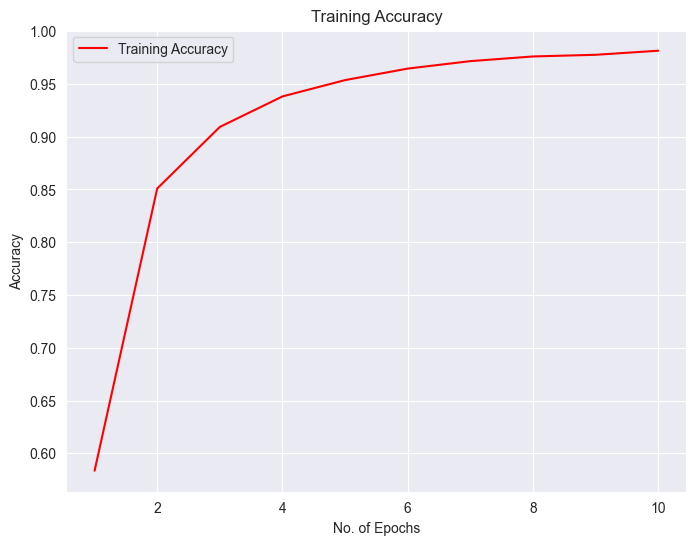

In [52]:
# Separate visualization for training accuracy
epochs = [i for i in range(1,11)]
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

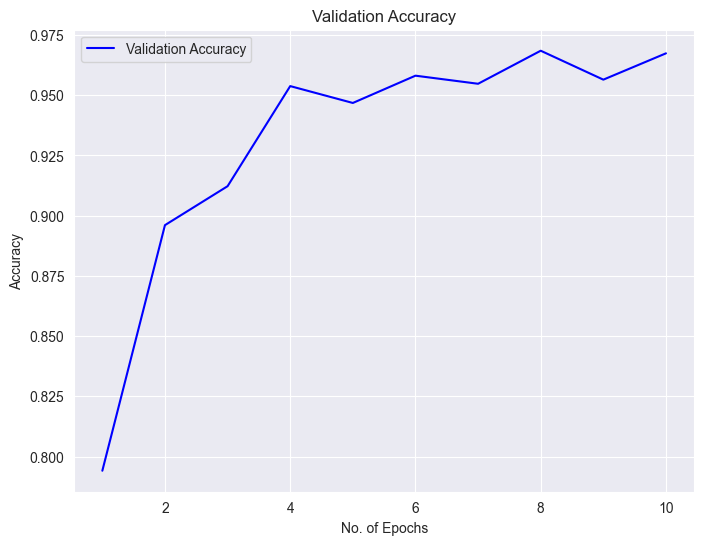

In [53]:
# Separate visualization for validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


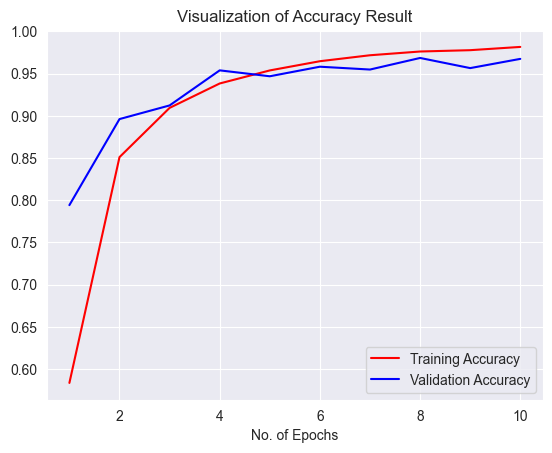

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation


In [55]:
class_name = validation_set.class_names

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 461s 26ms/step


In [58]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-11-21 10:49:04.198629: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [59]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [62]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.98      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

Confusion Matrix Visualization

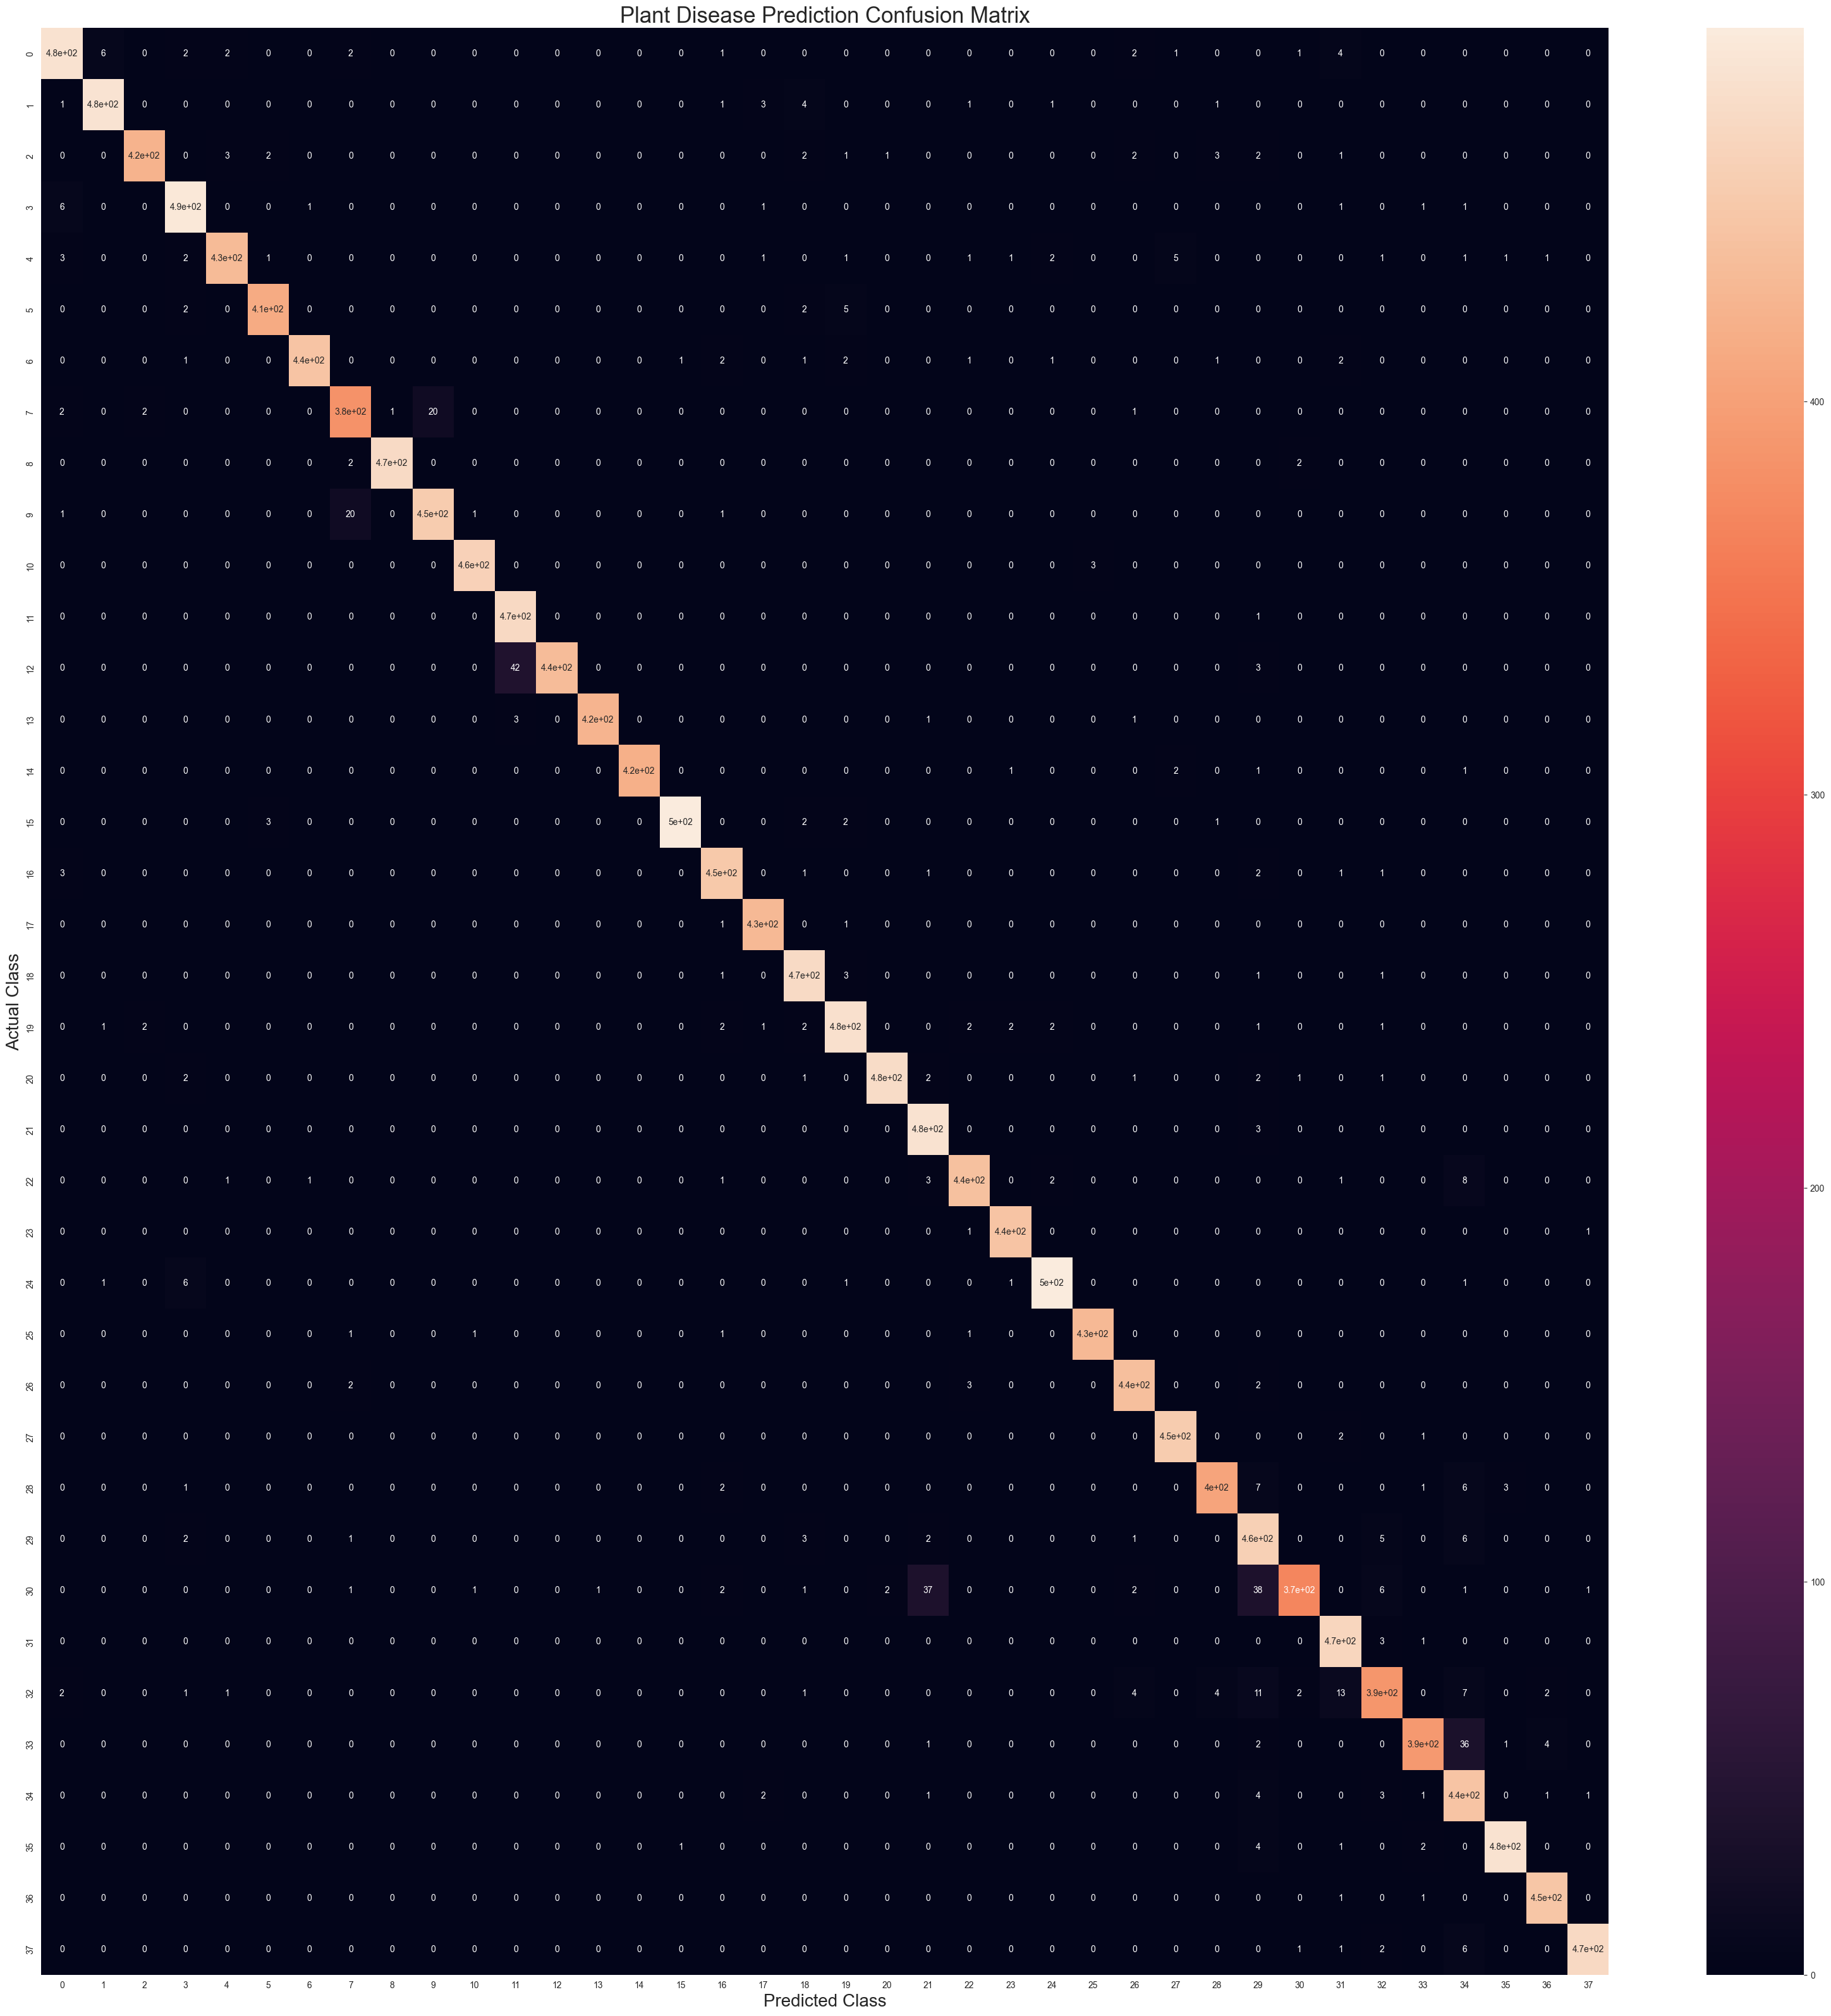

In [63]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
